# Lab 10: Open Ended Lab
---

# Importing the libraries

In [1]:
!pip install ucimlrepo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Importing the dataset

In [3]:
from ucimlrepo import fetch_ucirepo

adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# Data preprocessing

In [4]:
print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

X shape = (48842, 14)
y shape = (48842, 1)


In [5]:
df = pd.concat([X, y], axis = 1)

In [6]:
print(f"df shape = {df.shape}")

df shape = (48842, 15)


In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.income.unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [10]:
df.replace('<=50K.', '<=50K', inplace = True)

In [11]:
df.replace('>50K.', '>50K', inplace = True)

In [12]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [13]:
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

In [14]:
df.income.unique()

array([0, 1])

## Handling missing values

In [15]:
df.replace('?', np.nan, inplace=True)

In [16]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [17]:
imputer = SimpleImputer(strategy='most_frequent')

# Handle missing values using the mode

df['workclass'] = imputer.fit_transform(df[['workclass']]).ravel()
df['occupation'] = imputer.fit_transform(df[['occupation']]).ravel()
df['native-country'] = imputer.fit_transform(df[['native-country']]).ravel()

In [18]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Encoding categorical columns

In [19]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [20]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [21]:
le = LabelEncoder()

# Apply Label Encoding to all categorical columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [22]:
df.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
income            int64
dtype: object

In [23]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,3.099668,1.896641e+05,10.288420,10.078089,2.618750,6.152819,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382,36.433664,0.239282
std,13.710510,1.110810,1.056040e+05,3.874492,2.570973,1.507703,3.968837,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444,6.031536,0.426649
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.175505e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.781445e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.376420e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.490400e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [24]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


## Dropping uncorrelated columns

In [25]:
corr_matrix = df.corr()

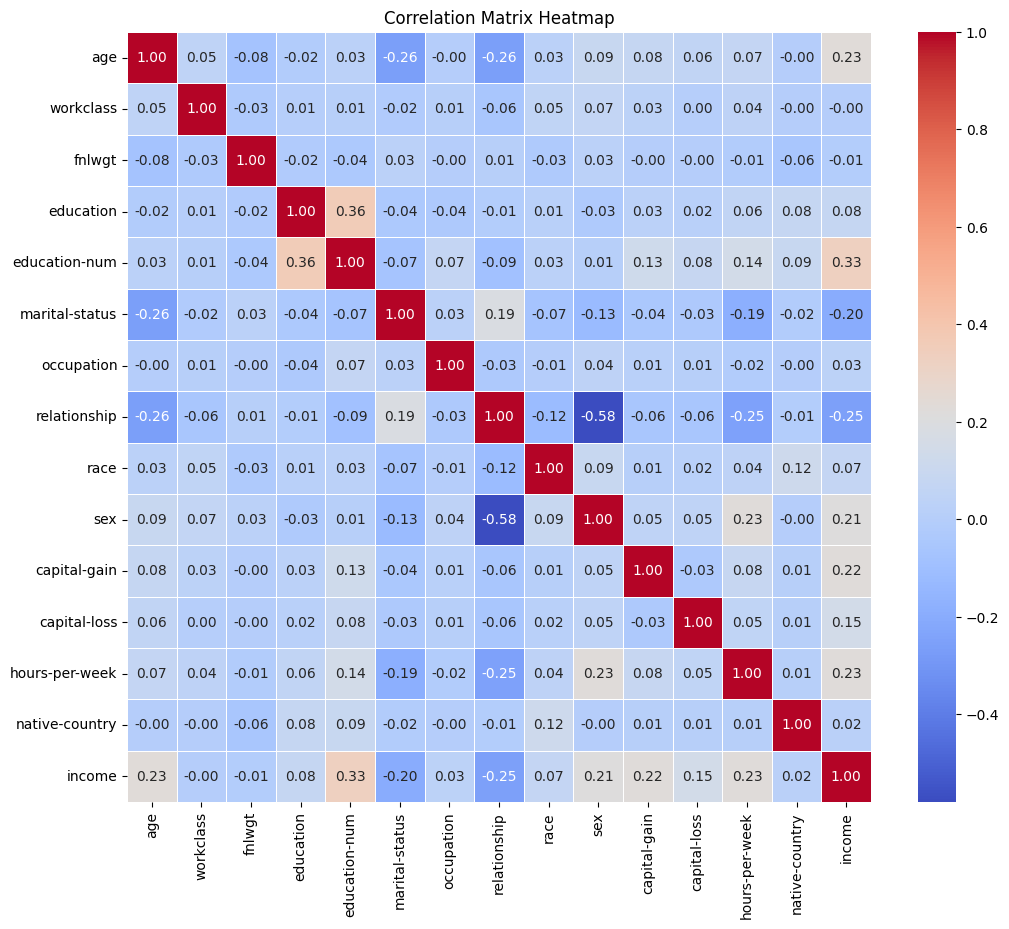

In [26]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Original shape: (48842, 15)
New shape after dropping columns: (48842, 10)


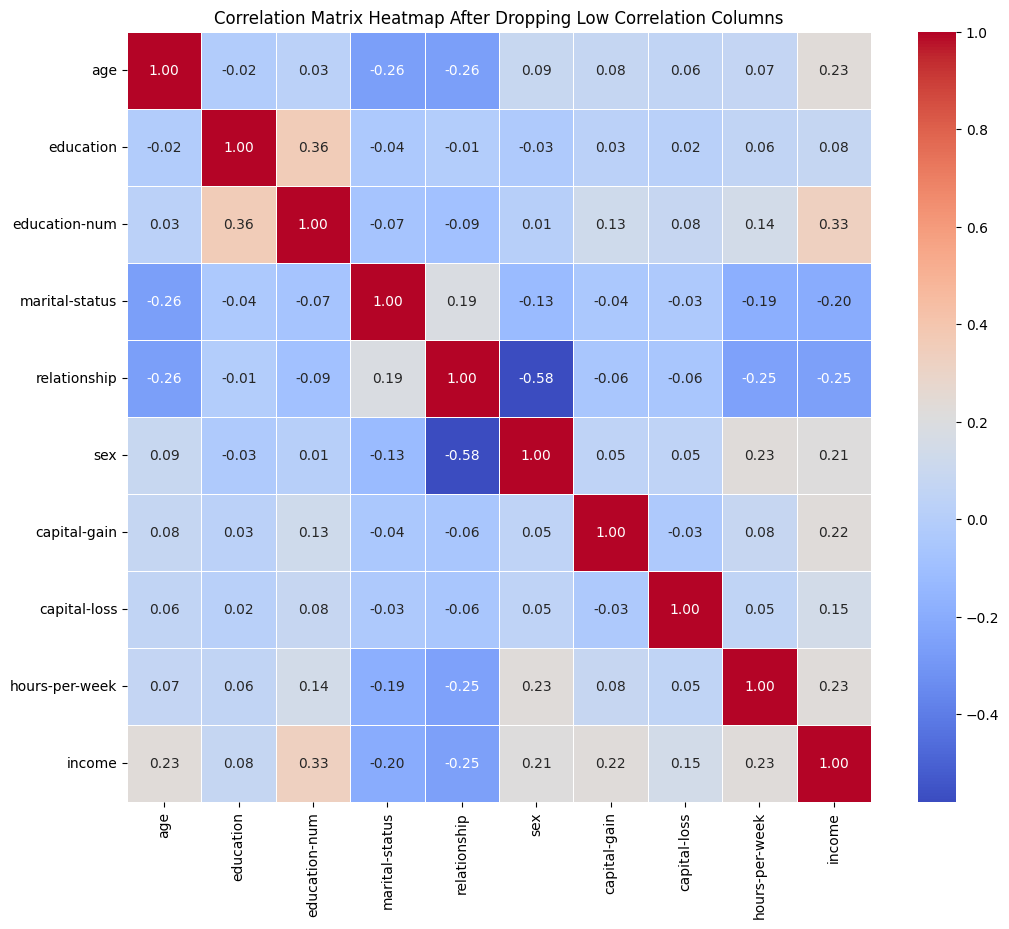

In [27]:
# Drop columns with low correlation with the target variable
columns_to_drop = ['workclass', 'fnlwgt', 'occupation', 'race', 'native-country']
df_dropped = df.drop(columns=columns_to_drop)

# Verify the new shape of the DataFrame
print(f"Original shape: {df.shape}")
print(f"New shape after dropping columns: {df_dropped.shape}")

# Compute the new correlation matrix
corr_matrix_dropped = df_dropped.corr()

# Plot the heatmap of the new correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_dropped, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap After Dropping Low Correlation Columns')
plt.show()


Original shape: (48842, 15)
New shape after dropping 'education' column: (48842, 9)


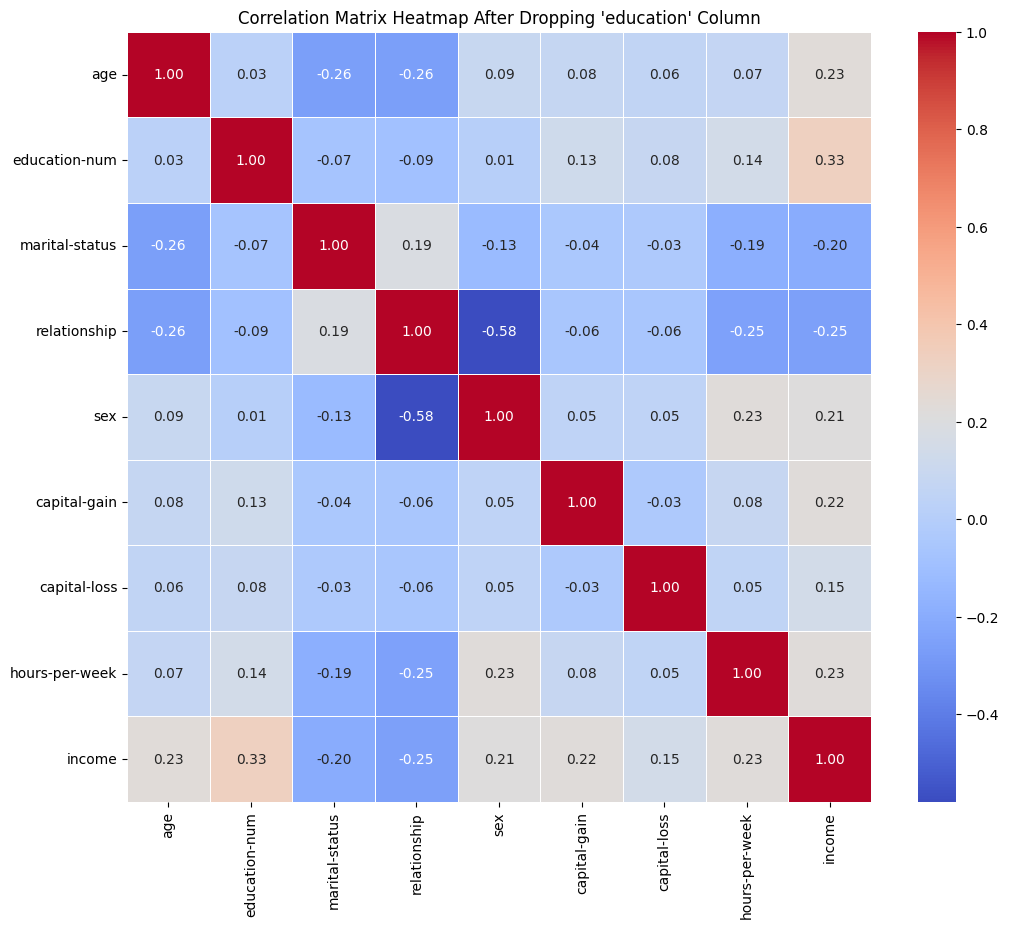

In [28]:
# Drop the 'education' column due to low correlation with the target variable
df_dropped = df_dropped.drop(columns=['education'])

# Verify the new shape of the DataFrame
print(f"Original shape: {df.shape}")
print(f"New shape after dropping 'education' column: {df_dropped.shape}")

# Compute the new correlation matrix
corr_matrix_dropped = df_dropped.corr()

# Plot the heatmap of the new correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_dropped, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap After Dropping \'education\' Column')
plt.show()


In [29]:
df_dropped.shape

(48842, 9)

## Splitting the dataset into training set and test set

In [30]:
X = df_dropped.drop(columns=['income'])
y = df_dropped['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape

(39073, 8)

In [32]:
X_test.shape

(9769, 8)

In [33]:
y_train.shape

(39073,)

In [34]:
y_test.shape

(9769,)

## Applying feature scaling

In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying the models

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
def find_best_logistic_regression_model(X, y):
    # Initializing logistic regression model
    model = LogisticRegression(max_iter=10000)

    # Applying k-fold cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Calculating mean accuracy
    mean_accuracy = scores.mean()

    # Printing mean accuracy
    print(f"Mean Accuracy of Logistic Regression: {mean_accuracy * 100:.2f} %")

    # Returning mean accuracy and the model
    return mean_accuracy, model

mean_accuracy, best_lr_model = find_best_logistic_regression_model(X_train_scaled, y_train)

Mean Accuracy of Logistic Regression: 82.46 %


In [38]:
best_lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [39]:
y_pred_lr = best_lr_model.predict(X_test_scaled)

In [40]:
cm = confusion_matrix(y_test, y_pred_lr)
print(f'Confusion Matrix \n\n{cm}')
print(f'\nAccuracy ={accuracy_score(y_test, y_pred_lr)*100 : .2f} %')

Confusion Matrix 

[[7007  407]
 [1298 1057]]

Accuracy = 82.55 %


## K-NN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
def find_best_knn_model(X, y, n_neighbors):
    best_mean_accuracy = 0
    best_k = None
    best_knn_model = None

    for k in n_neighbors:
        # Initializing KNN model with current k value
        model = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2)

        # Applying k-fold cross-validation
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

        # Calculating mean accuracy
        mean_accuracy = scores.mean()

        # Printing mean accuracy for current k value
        print(f"Mean Accuracy of KNN (k={k}): {mean_accuracy * 100:.2f} %")

        # Checking if current model has better accuracy than the previous best
        if mean_accuracy > best_mean_accuracy:
            best_mean_accuracy = mean_accuracy
            best_k = k
            best_knn_model = model

    # Printing the best k value and its corresponding mean accuracy
    print(f"\nBest KNN Model (k={best_k}), Mean Accuracy: {best_mean_accuracy * 100:.2f} %")

    # Returning the best mean accuracy and the best KNN model
    return best_mean_accuracy, best_knn_model

n_neighbors = [3, 4, 5] # using 3 different values

best_mean_accuracy, best_knn_model = find_best_knn_model(X_train_scaled, y_train, n_neighbors)

Mean Accuracy of KNN (k=3): 82.72 %
Mean Accuracy of KNN (k=4): 83.48 %
Mean Accuracy of KNN (k=5): 83.43 %

Best KNN Model (k=4), Mean Accuracy: 83.48 %


In [43]:
best_knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [44]:
y_pred_knn = best_knn_model.predict(X_test_scaled)

In [45]:
cm = confusion_matrix(y_test, y_pred_knn)
print(f'Confusion Matrix \n\n{cm}')
print(f'\nAccuracy ={accuracy_score(y_test, y_pred_knn)*100 : .2f} %')

Confusion Matrix 

[[6991  423]
 [1243 1112]]

Accuracy = 82.95 %


## SVM

In [46]:
from sklearn.svm import SVC

In [47]:
def find_best_svm_model(X, y):
    kernels = ['linear', 'rbf']
    best_mean_accuracy = 0
    best_kernel = None
    best_svm_model = None

    for kernel in kernels:
        # Initializing SVM model with current kernel
        model = SVC(kernel=kernel)

        # Applying k-fold cross-validation
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

        # Calculating mean accuracy
        mean_accuracy = scores.mean()

        # Printing mean accuracy for current kernel
        print(f"Mean Accuracy of SVM (kernel={kernel}): {mean_accuracy * 100:.2f} %")

        # Checking if current model has better accuracy than the previous best
        if mean_accuracy > best_mean_accuracy:
            best_mean_accuracy = mean_accuracy
            best_kernel = kernel
            best_svm_model = model

    # Printing the best kernel and its corresponding mean accuracy
    print(f"\nBest SVM Model (kernel={best_kernel}), Mean Accuracy: {best_mean_accuracy * 100:.2f} %")

    # Returning the best mean accuracy and the best SVM model
    return best_mean_accuracy, best_svm_model

best_mean_accuracy, best_svm_model = find_best_svm_model(X_train_scaled, y_train)

Mean Accuracy of SVM (kernel=linear): 81.37 %
Mean Accuracy of SVM (kernel=rbf): 85.06 %

Best SVM Model (kernel=rbf), Mean Accuracy: 85.06 %


In [48]:
best_svm_model.fit(X_train_scaled, y_train)

SVC()

In [49]:
y_pred_svm = best_svm_model.predict(X_test_scaled)

In [50]:
cm = confusion_matrix(y_test, y_pred_svm)
print(f'Confusion Matrix \n\n{cm}')
print(f'\nAccuracy ={accuracy_score(y_test, y_pred_svm)*100 : .2f} %')

Confusion Matrix 

[[7031  383]
 [1101 1254]]

Accuracy = 84.81 %


## Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
def find_best_naive_bayes_model(X, y):
    # Initializing Naive Bayes model
    model = GaussianNB()

    # Applying k-fold cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Calculating mean accuracy
    mean_accuracy = scores.mean()

    # Printing mean accuracy
    print(f"Mean Accuracy of Naive Bayes: {mean_accuracy * 100:.2f} %")

    # Returning mean accuracy and the model
    return mean_accuracy, model

best_mean_accuracy, best_gnb_model = find_best_naive_bayes_model(X_train_scaled, y_train)

Mean Accuracy of Naive Bayes: 79.94 %


In [53]:
best_gnb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [54]:
y_pred_gnb = best_gnb_model.predict(X_test_scaled)

In [55]:
cm = confusion_matrix(y_test, y_pred_gnb)
print(f'Confusion Matrix \n\n{cm}')
print(f'\nAccuracy ={accuracy_score(y_test, y_pred_gnb)*100 : .2f} %')

Confusion Matrix 

[[7082  332]
 [1632  723]]

Accuracy = 79.90 %


## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
def find_best_decision_tree_model(X, y):
    # Initializing Decision Tree model
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

    # Applying k-fold cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Calculating mean accuracy
    mean_accuracy = scores.mean()

    # Printing mean accuracy
    print(f"Mean Accuracy of Decision Tree: {mean_accuracy * 100:.2f} %")

    # Returning mean accuracy and the model
    return mean_accuracy, model

best_mean_accuracy, best_dt_model = find_best_decision_tree_model(X_train_scaled, y_train)

Mean Accuracy of Decision Tree: 83.36 %


In [58]:
best_dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [59]:
y_pred_dt = best_dt_model.predict(X_test_scaled)

In [60]:
cm = confusion_matrix(y_test, y_pred_dt)
print(f'Confusion Matrix \n\n{cm}')
print(f'\nAccuracy ={accuracy_score(y_test, y_pred_dt)*100 : .2f} %')

Confusion Matrix 

[[6772  642]
 [ 995 1360]]

Accuracy = 83.24 %


## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
def find_best_random_forest_model(X, y):
    # Initializing Random Forest model
    model = RandomForestClassifier(criterion = 'entropy', random_state = 0)

    # Applying k-fold cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Calculating mean accuracy
    mean_accuracy = scores.mean()

    # Printing mean accuracy
    print(f"Mean Accuracy of Random Forest: {mean_accuracy * 100:.2f} %")

    # Returning mean accuracy and the model
    return mean_accuracy, model

best_mean_accuracy, best_rf_model = find_best_random_forest_model(X_train_scaled, y_train)

Mean Accuracy of Random Forest: 84.61 %


In [63]:
best_rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [64]:
y_pred_rf = best_knn_model.predict(X_test_scaled)

In [65]:
cm = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix \n\n{cm}')
print(f'\nAccuracy ={accuracy_score(y_test, y_pred_rf)*100 : .2f} %')

Confusion Matrix 

[[6991  423]
 [1243 1112]]

Accuracy = 82.95 %


# Conclusion

Based on the evaluation metrics on the test set, the model with the `highest accuracy` is the `KNN model with k=5`, achieving an `accuracy of 84.81%`. This indicates that among the tested models, KNN with k=5 performs the best in accurately predicting income levels.

The `KNN model with k=5` outperforms other models such as Logistic Regression, SVM (kernel=rbf), Naive Bayes, Decision Tree, and Random Forest in terms of accuracy on the test set.


---